# **TELCO CUSTOMER CHURN**

AHMADES SEPTIAN RAHMADSYAH

# **CONTENT**

1. BUSINESS PROBLEMS

2. DATA UNDERSTANDING

3. MODELING

4. CONCLUTION AND RECOMMENDATION

In [68]:
# Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
import category_encoders as ce
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline


# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Business Problem Understanding

**Context**

Dalam dunia komersial, pelanggan adalah raja. Memahami pelanggan adalah hal yang paling penting dan memahami pola perilaku mereka dapat menghasilkan keputusan bisnis yang sangat berdampak. Customer Churn adalah tingkat di mana pelanggan komersial meninggalkan bisnis/platform komersial dan membawa uangnya ke tempat lain, dan memahami pola dasar pelanggan akan sangat memengaruhi kemampuan bisnis untuk mempertahankan pelanggannya. Sebagai seorang peneliti data yang mencoba masuk ke dunia profesional, menurut saya penting untuk mendapatkan pemahaman yang lebih baik tentang seperti apa fitur churn data ini dan bagaimana fitur tersebut dapat digunakan untuk memahami pelanggan.

Seorang Data Scientist diminta untuk membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak dengan menggunakan machine learning. 

Target :

1 : Berhenti berlangganan (churn)

0 : Tidak berhenti berlangganan




**Problem Statement:**

Banyak faktor yang mempengaruhi alasan seorang pelanggan melakukan Churn. Mungkin fakta bahwa ada pesaing baru di pasar yang menawarkan harga lebih baik atau mungkin layanan yang mereka dapatkan belum sesuai standar, dll.

Perusahaan telekomunikasi dapat memberikan insentif retensi seperti memberikan potongan harga, memberikan paket layanan yang menarik, memberikan
prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan pelanggan. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan mengurangi potensi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti berlangganan.

**STAKE HOLDER**
- MANAJER MARKETING PERUSAHAAN adalah orang yang bertanggung jawab dalam memasarkan dan mengenalkan produk telekomunikasi.

- CUSTOMER SERVICES merupakan orang yang melayani pelanggan dan calon pelanggan produk telekomunikasi


**Goals:**

Berdasarkan permasalahan tersebut, perusahaan ingin memprediksi pelanggan mana yang loyal dan akan churn berdasankan waktu tertentu. Hal ini sejalan untuk meningkatkan potensi keuntungan yang akan diperoleh perusahaan. Dan juga, perusahaan ingin mengetahui faktor-faktor apa saja yang cenderung mempengaruhi pelanggan bertahan, sehingga mereka dapat membuat program-program yang lebih tepat sasaran dalam mengurangi jumlah pelanggan yang churn. 

Untuk memaksimalkan efisiensi biaya, perusahaan bertujuan untuk fokus pada pelanggan sasaran (mereka yang berpotensi berisiko churn) dengan meningkatkan `Recall Score`. Pendekatan ini melibatkan:

1. Perusahaan ingin **memprediksi pelanggan mana yang kemungkinan besar akan churn**. Hal ini akan memungkinkan mereka untuk memusatkan upaya mereka pada pelanggan sasaran yang berisiko melakukan churn.

1. Perusahaan ingin mengetahui **berapa banyak penghematan yang dapat dicapai** dengan penerapan model pembelajaran mesin.


1. Perusahaan ingin **mengidentifikasi faktor-faktor yang mempengaruhi retensi pelanggan**. Pengetahuan ini akan membantu mereka mengembangkan program yang lebih tepat sasaran untuk mengurangi jumlah pelanggan yang churn.

**Analytic Approach:**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan berhenti berlangganan (churn) atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan berhenti berlangganan (churn) atau tidak. 

**Metric Evaluation**

Type 1 error : False Positive (pelanggan yang aktualnya tidak churn tetapi diprediksi churn)
Konsekuensi: tidak efektifnya pemberian insentif retensi

Type 2 error : False Negative (pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn)
Konsekuensi: kehilangan pelanggan

Berdasarkan konsekuensinya, maka hal terbaik yang dapat dioptimasikan yaitu meminimalkan biara yang dikeluarkan untuk penawaran khusus untuk pelanggam tetapi juga tidak membuat pelanggan menjadi churn/tidak berlangganan lagi. Maka metric yang cocok untuk hal ini adalah recall  yaitu memaksimalkan nilai **Recall/True Positive Rate** dan meminimalkan **False Negatif**. Hal ini sama dengan mengoptimalkan nilai recall, sehinggan recall menjadi parameter kunci dalam kasus ini

# DATA UNDERSTANDING

Tahap pertama yang akan kita lakukan adalah memahami data yang akan kita gunakan

In [3]:
tc = pd.read_csv("C:\\Users\\Septian\\Downloads\\data_telco_customer_churn.csv")
tc.head()

Dependents  tenure       OnlineSecurity         OnlineBackup  \
0        Yes       9                   No                   No   
1         No      14                   No                  Yes   
2         No      64                  Yes                   No   
3         No      72                  Yes                  Yes   
4         No       3  No internet service  No internet service   

  InternetService     DeviceProtection          TechSupport        Contract  \
0             DSL                  Yes                  Yes  Month-to-month   
1     Fiber optic                  Yes                   No  Month-to-month   
2             DSL                  Yes                  Yes        Two year   
3             DSL                  Yes                  Yes        Two year   
4              No  No internet service  No internet service  Month-to-month   

  PaperlessBilling  MonthlyCharges Churn  
0              Yes           72.90   Yes  
1              Yes           82.65    No  
2               No           47.85   Yes  
3               No           69.65    No  
4              Yes           23.60    No

In [4]:
tc.tail()

Dependents  tenure       OnlineSecurity         OnlineBackup  \
4925         No      15                   No                   No   
4926        Yes      10                   No                   No   
4927         No      58  No internet service  No internet service   
4928         No       1                   No                   No   
4929        Yes       4  No internet service  No internet service   

     InternetService     DeviceProtection          TechSupport  \
4925     Fiber optic                  Yes                  Yes   
4926     Fiber optic                  Yes                  Yes   
4927              No  No internet service  No internet service   
4928     Fiber optic                   No                   No   
4929              No  No internet service  No internet service   

            Contract PaperlessBilling  MonthlyCharges Churn  
4925  Month-to-month              Yes          103.45    No  
4926  Month-to-month              Yes           91.10    No  
4927        Two year               No           20.75    No  
4928  Month-to-month              Yes           69.75   Yes  
4929  Month-to-month               No           20.40    No

In [5]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [6]:
#Persentase churn
tc['Churn'].value_counts()/len(tc) *100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

In [7]:
tc['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

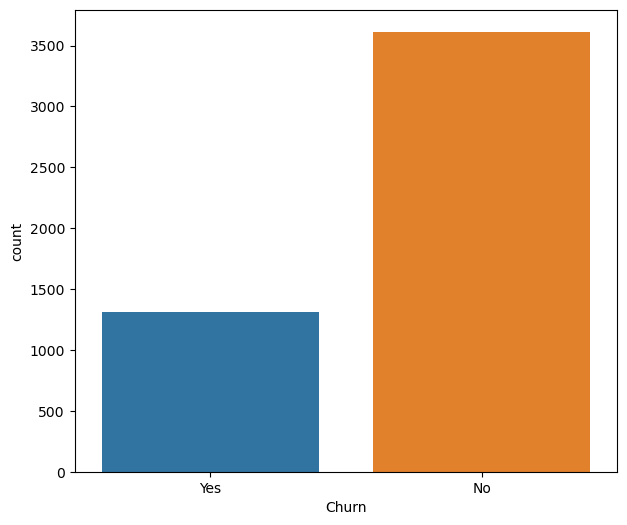

In [8]:
plt.figure(figsize=(7,6))
sns.countplot(data=tc, x='Churn')
plt.show()

- Data set Telco Customer Churn memiliki 11 kolom dan 4930 baris
- Informasi demografi pelanggan yaitu `Dependents`.
- Service yang digunakan oleh pelanggan : `Online Security`, `Online Backup`, `Internet Service`, `Device Protection`, `Tech Support`
- Informasi akun pelanggan : `tenure`, `Contract`, `PaperlessBilling`, dan `MonthlyCharges`
- Pelanggan yang berhenti berlangganan – kolomnya disebut `Churn`

- Kolom numerik yaitu `tenure` dan `MonthlyCharges`
- Kolom kategorikal yaitu:
   - `Dependents`       : Apakah pelanggan memiliki ketergantungan atau tidak (Yes/No). 
   - `Online Security`  : Apakah pelanggan memiliki keamanan secara online (Yes/No).  
   - `Online Backup`    : Apakah pelanggan memiliki backup secara online (Yes/No).
   - `Internet Service` : Jenis layanan internet yang digunakan pelanggan.
   - `Device Protection`: Apakah Pelanggan memiliki keamanan perangkatat (Yes/No).
   - `Tech Support`     : Apakah Pelanggan memiliki bantuan teknis (Yes/No)
   - `Contract`         : Tipe kontrak pelanggan
   - `PaperlessBilling` : Pembayaran tanpa bill kertas (Yes/No)
- Kolom target adalah `churn` dengan nilai no sebesar 3614 dan yes 1316

In [9]:
tc.describe(include='object')

Dependents OnlineSecurity OnlineBackup InternetService  \
count        4930           4930         4930            4930   
unique          2              3            3               3   
top            No             No           No     Fiber optic   
freq         3446           2445         2172            2172   

       DeviceProtection TechSupport        Contract PaperlessBilling Churn  
count              4930        4930            4930             4930  4930  
unique                3           3               3                2     2  
top                  No          No  Month-to-month              Yes    No  
freq               2186        2467            2721             2957  3614

In [10]:
tc.describe(include='all')

Dependents       tenure OnlineSecurity OnlineBackup InternetService  \
count        4930  4930.000000           4930         4930            4930   
unique          2          NaN              3            3               3   
top            No          NaN             No           No     Fiber optic   
freq         3446          NaN           2445         2172            2172   
mean          NaN    32.401217            NaN          NaN             NaN   
std           NaN    24.501193            NaN          NaN             NaN   
min           NaN     0.000000            NaN          NaN             NaN   
25%           NaN     9.000000            NaN          NaN             NaN   
50%           NaN    29.000000            NaN          NaN             NaN   
75%           NaN    55.000000            NaN          NaN             NaN   
max           NaN    72.000000            NaN          NaN             NaN   

       DeviceProtection TechSupport        Contract PaperlessBilling  \
count              4930        4930            4930             4930   
unique                3           3               3                2   
top                  No          No  Month-to-month              Yes   
freq               2186        2467            2721             2957   
mean                NaN         NaN             NaN              NaN   
std                 NaN         NaN             NaN              NaN   
min                 NaN         NaN             NaN              NaN   
25%                 NaN         NaN             NaN              NaN   
50%                 NaN         NaN             NaN              NaN   
75%                 NaN         NaN             NaN              NaN   
max                 NaN         NaN             NaN              NaN   

        MonthlyCharges Churn  
count      4930.000000  4930  
unique             NaN     2  
top                NaN    No  
freq               NaN  3614  
mean         64.883032   NaN  
std          29.923960   NaN  
min          18.800000   NaN  
25%          37.050000   NaN  
50%          70.350000   NaN  
75%          89.850000   NaN  
max         118.650000   NaN

In [11]:
pd.set_option('display.max_colwidth', 0)
# Identifikasi jumlah unique, persentase missing value, dan unique pada dataset.
listItem = []
for col in tc.columns :
    listItem.append( [col, tc[col].nunique(), tc[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Dependents        2                  
1   tenure            73                 
2   OnlineSecurity    3                  
3   OnlineBackup      3                  
4   InternetService   3                  
5   DeviceProtection  3                  
6   TechSupport       3                  
7   Contract          3                  
8   PaperlessBilling  2                  
9   MonthlyCharges    1422               
10  Churn             2                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Unique Sample  
0   [Yes, No]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1   [9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]                                                                                                                                                                                                                                                                                                                                                                                                     
2   [No, Yes, No internet service]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
3   [No, Yes, No internet service]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
4   [DSL, Fiber optic, No]                                                                                                  

- **Tenure** berupa data diskrit dengan nilai bervariasi antara 0 sampai dengan 72 bulan dengan median pada 29 bulan
- Terdapat 3 pilihan Contract yaitu Month-to-month, One year, dan Two Year
- **InternetService** berisi pilihan berupa 'DSL', 'Fiber Optic' dan 'No'
- **MonthlyCharges** berupa data kontinu dengan nilai rata-rata 64.8
- **Dependent, Paperless Billing, dan Churn** memiliki nilai 'Yes' atau 'No'
- **OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport** berisi pilihan 'Yes', 'No' atau 'No internet service'.


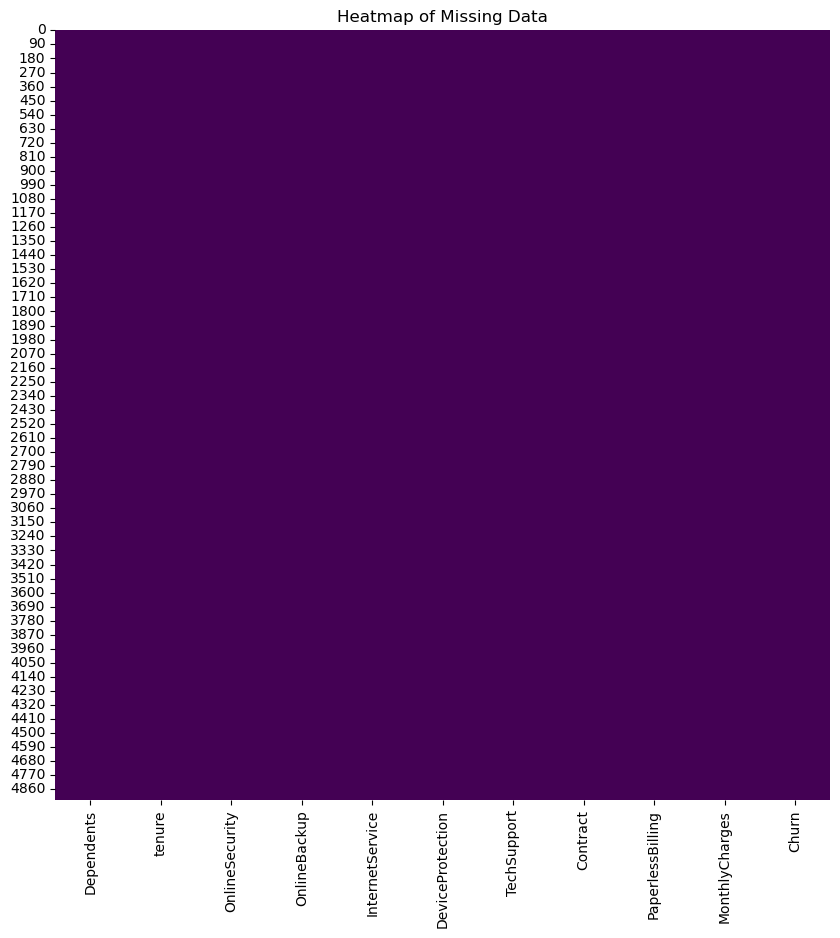

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(tc.isna(), cbar=False, cmap='viridis')

plt.title('Heatmap of Missing Data')
plt.show()

Dari grafik diatas dapat dilihat bahwa tidak terdapat missing value pada dataset

In [13]:
tc.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dapat dilihat bahwa data tidak memiliki missing value

# EDA

FEATURE KATEOGIKAL

In [14]:
kategoikal = [feature for feature in tc.columns if tc[feature].dtypes == 'O']
kategoikal

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

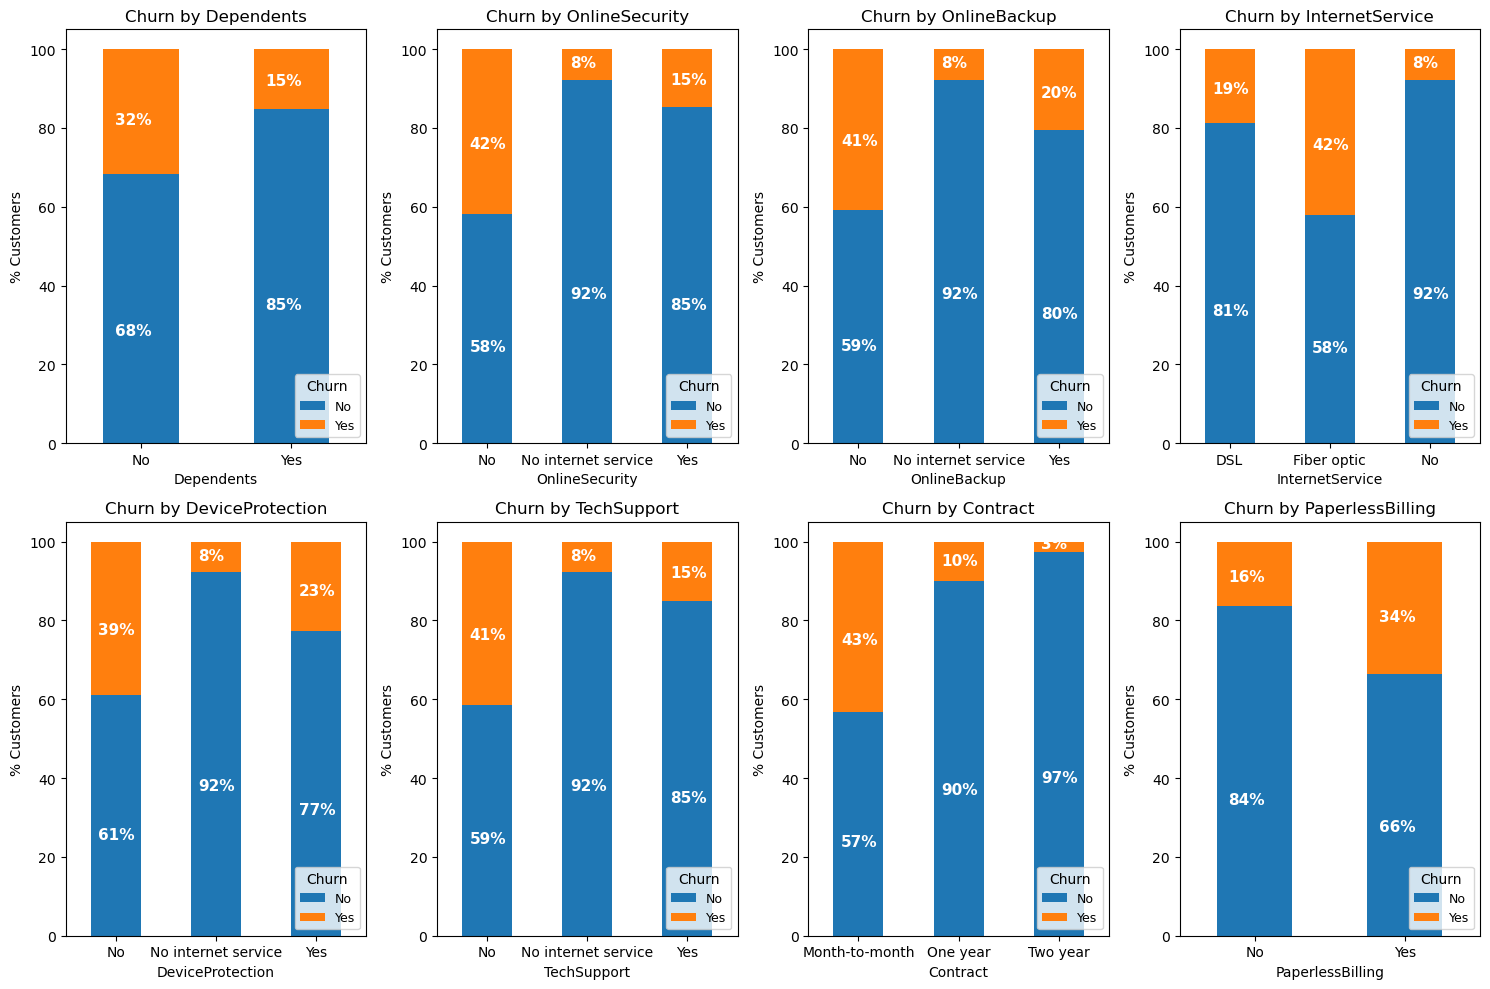

In [15]:
plt.figure(figsize=(15, 10))
plotnumber = 1

for feature in kategoikal[:-1]:

        column1 = feature

        # create a new subplot for every source
        groupby_table = tc.groupby([column1,'Churn']).size().unstack()

        # Label data
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot
        ax = plt.subplot(2, 4, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,)

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # labeling the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
        
        plt.tight_layout();
        
        plotnumber += 1

- Pelanggan yang tidak memiliki `Dependent` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan Pelanggan yang memiliki `Dependent`
- Pelanggan yang `InternetService`nya menggunakan Fiber optic lebih cenderung untuk berhenti berlangganan (churn) dibandingkan `InternetService` yang lain.
- Pelanggan yang tidak menggunakan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan yang menggunakan.
- Pelanggan yang `Contract`nya Month-to-month lebih cenderung untuk berhenti berlangganan (churn) dibandingkan `Contract` yang lain. Bahkan yang `Contract`nya Two year hanya memiliki persentase churn sekitar 3%.
- Pelanggan yang menggunakan `PaperlessBilling` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan dengan yang tidak

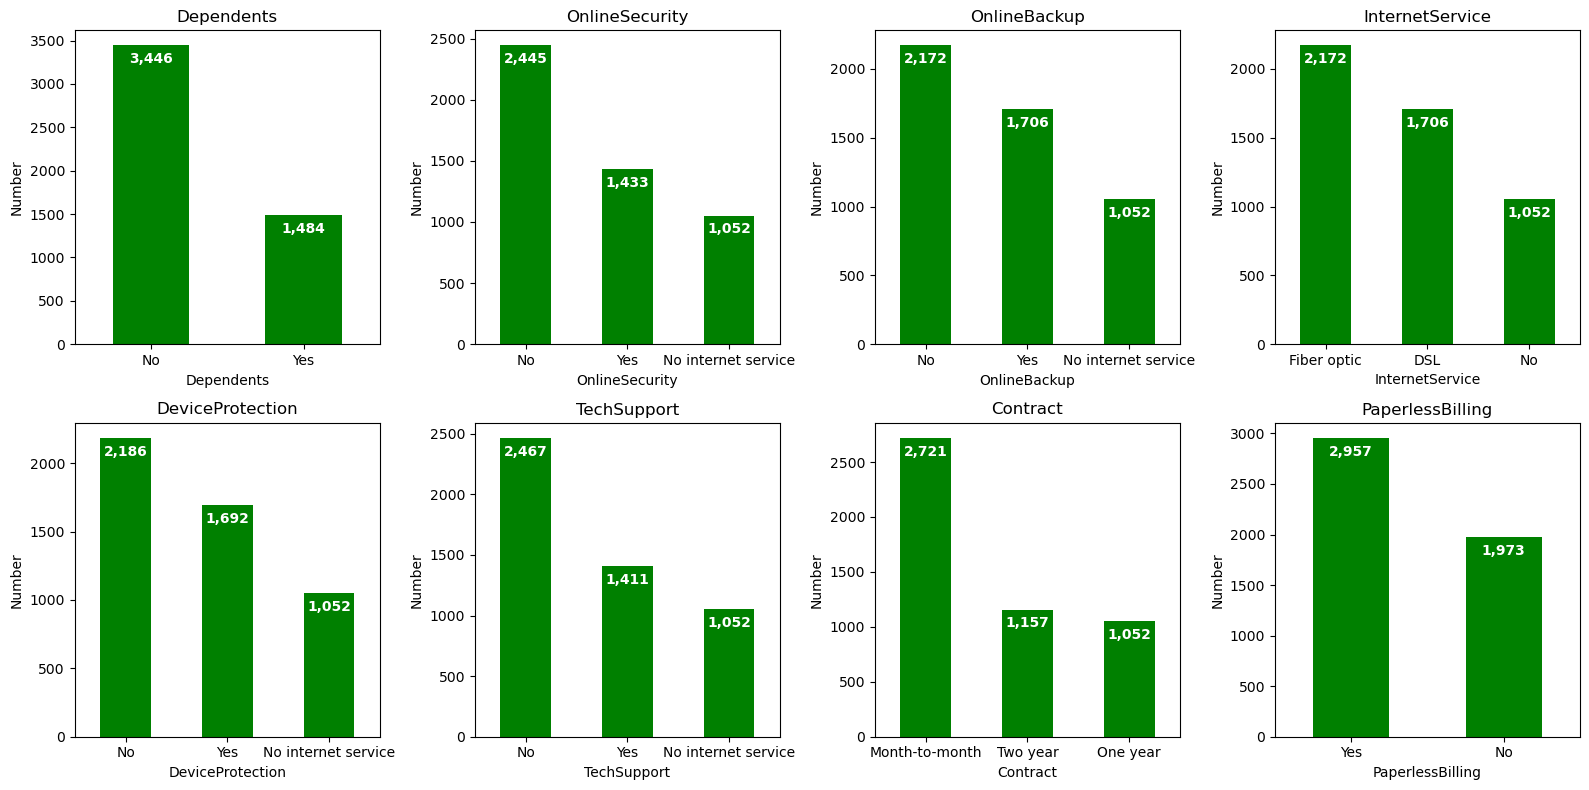

In [16]:
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1

for feature in kategoikal[:-1]:
    # subplot (letak grafik)
    ax = plt.subplot(2, 4, plotnumber)
    ax = tc[feature].value_counts().plot(kind = 'bar', rot = 0, color=['green'])
    plt.ylabel('Number')
    plt.xlabel(feature)
    plt.title(feature, fontsize=12)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = -15, color="white", fontweight='bold')
    plt.tight_layout();
    plotnumber += 1

- Mayoitas Pelanggan tidak memiliki tanggungan
- mayoritas pelanggan tidak menggunakan online security, online backup, dan device protection
- mayoritas pelanggan menggunakan internet fiber optic
- Mayoritas pelanggan memiliki kontrak month to month
- Banyak pelanggan yang menggunakan sistem paperlessBilling

**FEATURE NUMERIK**

In [17]:
numerik = [feature for feature in tc.describe().columns]
numerik

['tenure', 'MonthlyCharges']

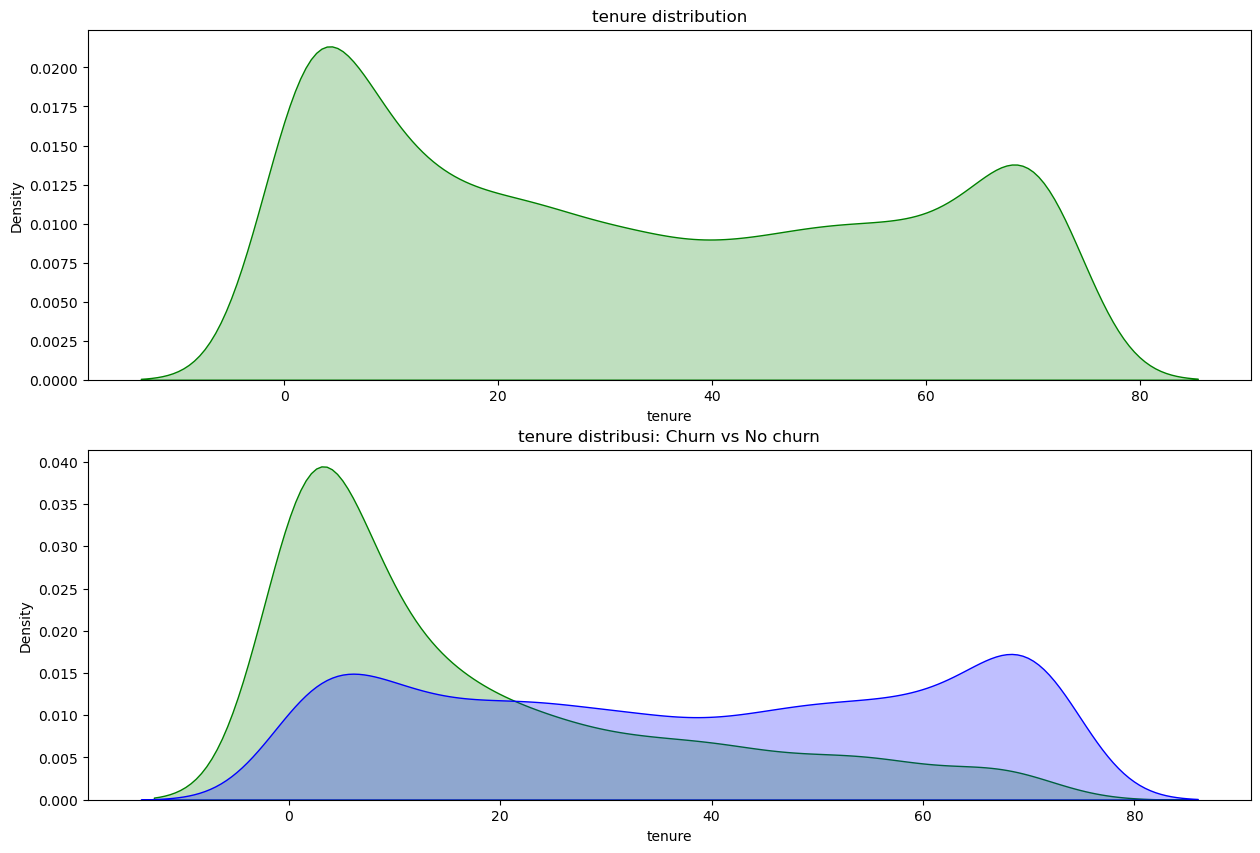

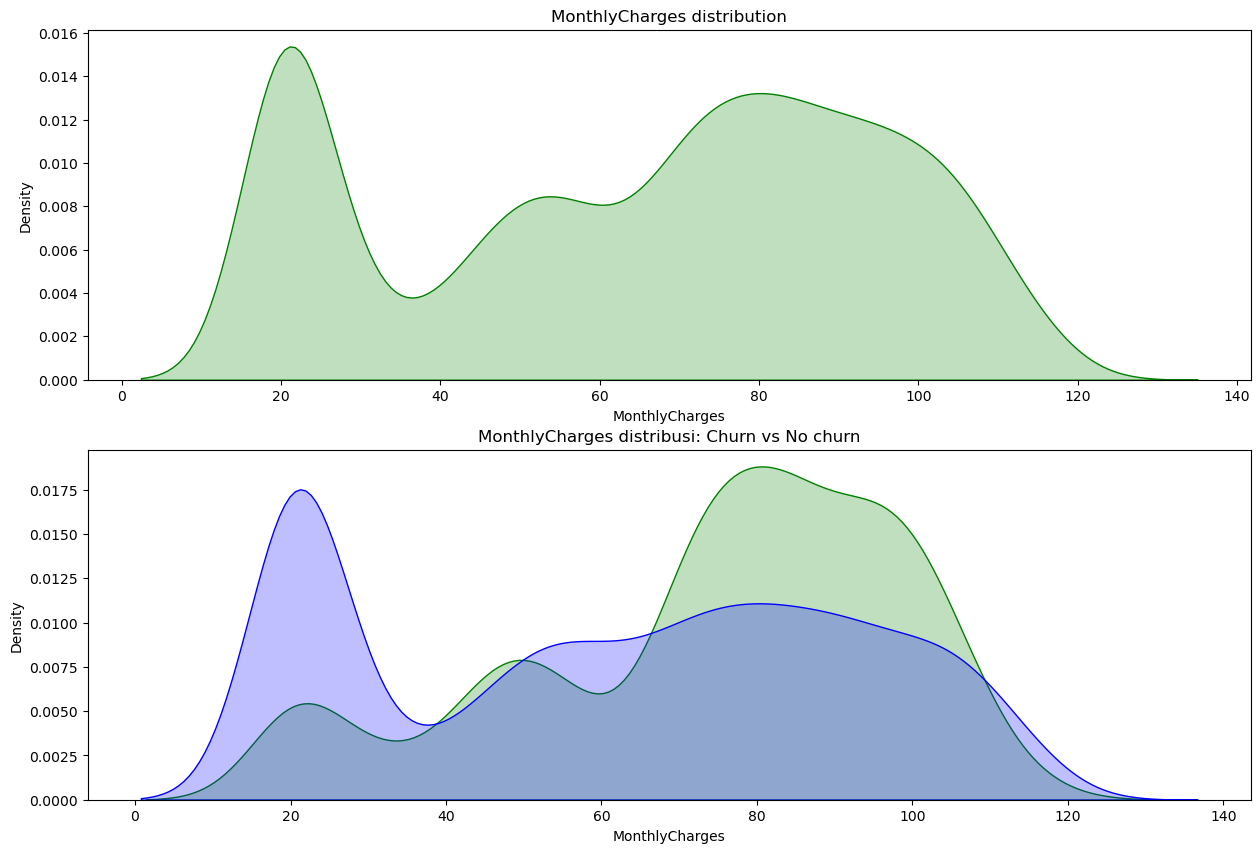

In [18]:
def Numerical_distribution(tc,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(tc[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str =  feature + " distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(tc.loc[(tc['Churn']== 'Yes'),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(tc.loc[(tc['Churn']=='No') ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No Chrun')
    
    title_str = feature + " distribusi: Churn vs No churn"
    plt.title(title_str)
    plt.show()
Numerical_distribution(tc,'tenure')
Numerical_distribution(tc,'MonthlyCharges')

Text(0, 0.5, 'Jumlah Pelanggan')

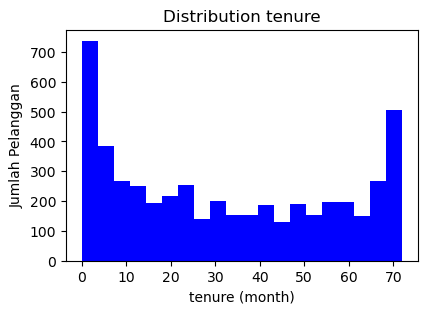

In [19]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(tc['tenure'], bins=20, color='blue')
plt.title('Distribution tenure')
plt.xlabel('tenure (month)')
plt.ylabel('Jumlah Pelanggan')


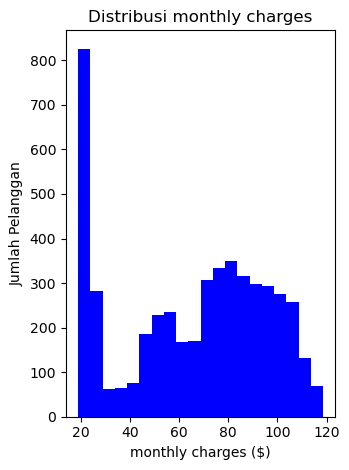

In [20]:
plt.subplot(1, 2, 1)
plt.hist(tc['MonthlyCharges'], bins=20, color='blue')
plt.title('Distribusi monthly charges')
plt.xlabel('monthly charges ($)')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

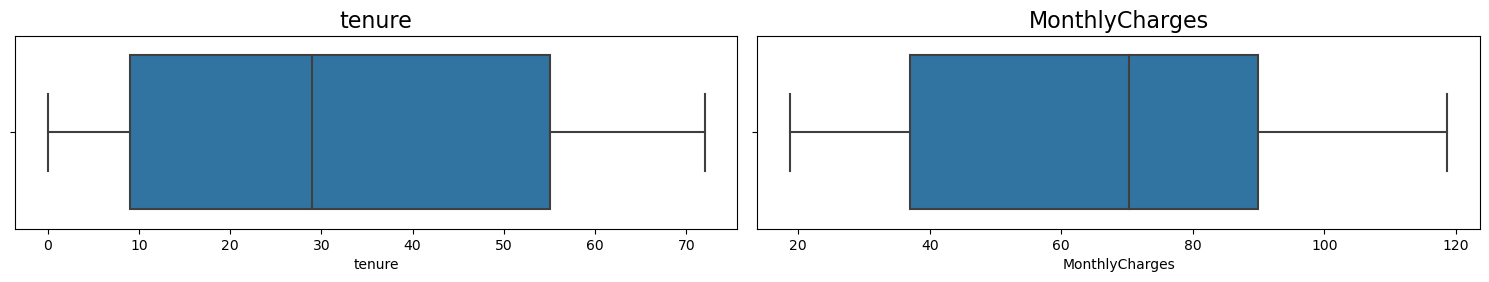

In [21]:
plt.figure(figsize=(15, 5), facecolor='white')
plotnumber = 1
    
for feature in numerik:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=tc);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

- Dapat Dilihat bahwa tenure dan monthly charges tidak terdistribusi dengan normal
- tidak terdapat outlier pada tenure dan monthly charges

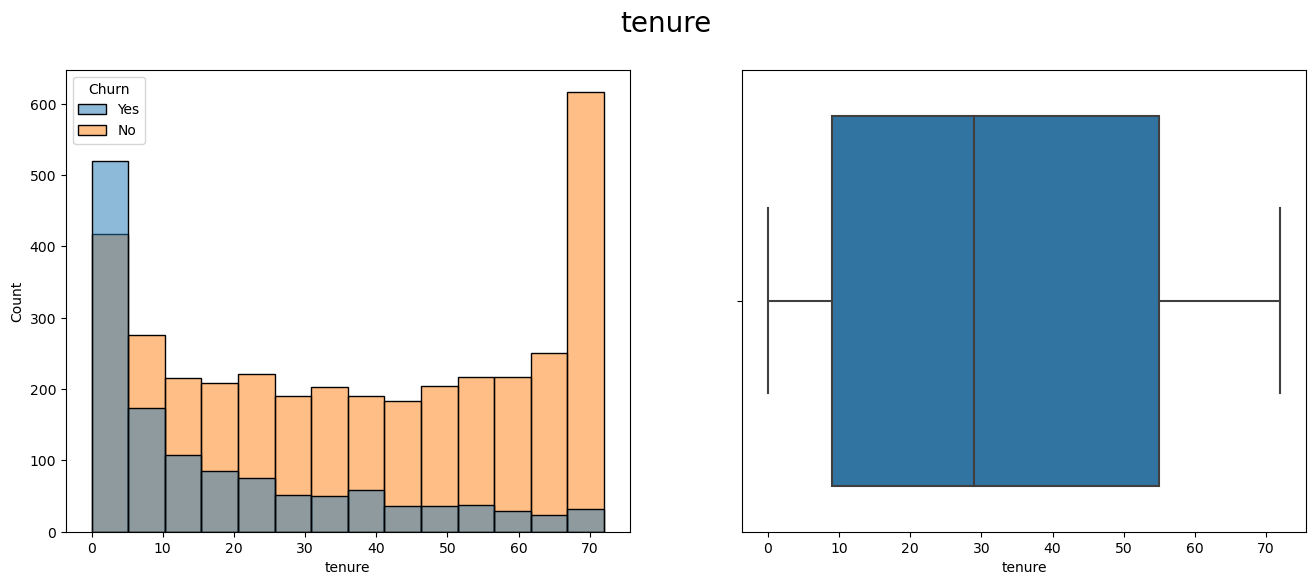

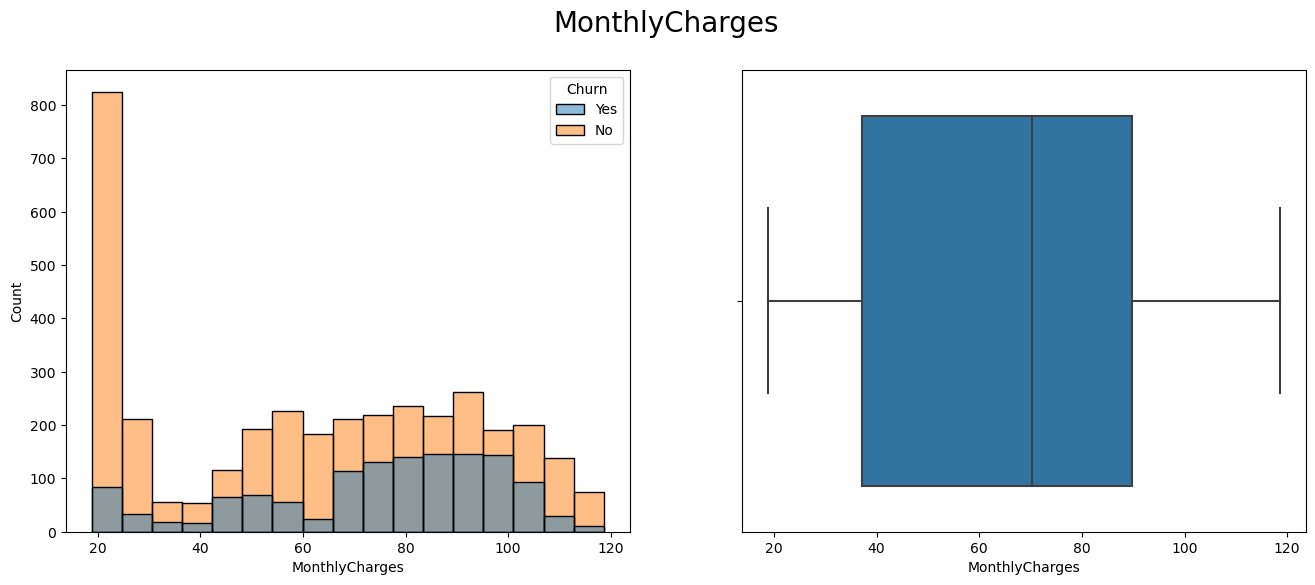

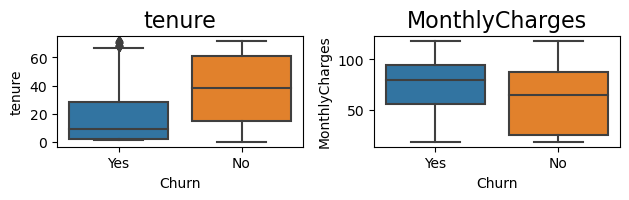

In [22]:
for col in numerik:
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    plt.suptitle(col, fontsize=20)
    sns.histplot(data=tc, x=col, hue='Churn', ax=axes[0])
    sns.boxplot(data=tc, x=col, hue='Churn', ax=axes[1])
    plt.show()
for feature in numerik:
    ax = plt.subplot(3,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=tc);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

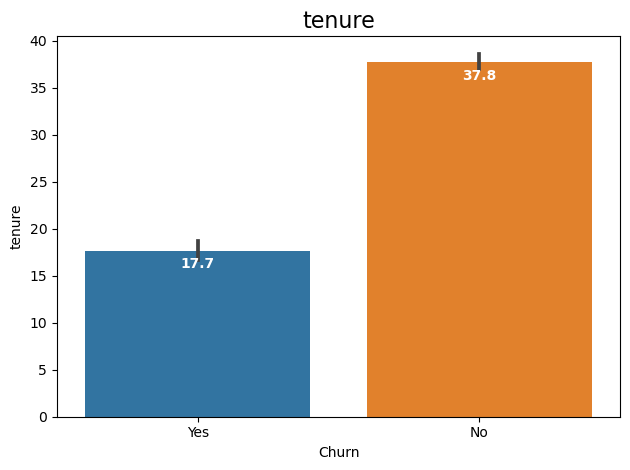

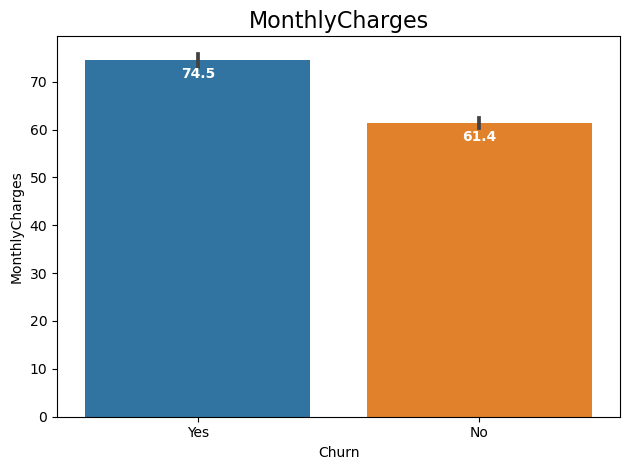

In [23]:
for feature in numerik:
    plt.figure(plotnumber)  # Create a new figure for each plot
    ax = sns.barplot(y=feature, x='Churn', data=tc)
    plt.title(feature, fontsize=16)
    
    # Add bar labels
    container = ax.containers[0]
    ax.bar_label(container, labels=[f'{x:,.1f}' for x in container.datavalues], label_type='edge', padding=-15, color="white", fontweight='bold')
    
    plt.tight_layout()
    plotnumber += 1

plt.show()  # Display all plots

- Dapat dilihat bahwa pelanggan dengan tenure yang lama cenderung tidak churn, sedangkan pelanggan dengan masa tenure yang kecil cenderung churn
- Dapat dilihat bahwa tidak terlalu ada perbedaan antara pelanggan dengan monthly charge yanng lebih besar dan yang kecil dalam memilih churn, memang dari gambar diatas dapat dilihat bahwa pelanggan dengan monthly charges yang lebih besar cenderung churn, tetapi selisihnya tidak terlalu besar

# DATA PREPARATION

melakukan copy data fame terlebih dahulu agar dataframe awal tidak hilang

In [24]:
tc_churn = tc.copy()

**MENGUBAH NILAI**

**-CHURN-**

Kolom churn berisikan nilai "yes" dan "no", jadi akan kita ubah menjadi nilai `1` untuk "yes" dan `0` untuk "no"

0 : Tidak berhenti berlangganan (`Churn` == 'No')

1 : Berhenti berlangganan (`Churn` == 'Yes')

In [25]:
tc_churn['Churn'] = np.where(tc_churn['Churn']=='No',0,1)
tc_churn['Churn'].unique()

array([1, 0])

**MENGGANTIKAN "NO INTERNET SERVICE" MENJADI "NO"**

Nilai dari "no internet service' dapat kita anggap menjadi nilai "no", dikarenakan tidak memakai internet sama saja dengan tidak memakai layanan yang berhubungan dengan internet service

In [26]:
df_no_internet = tc_churn[tc_churn['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique          Unique Values
0  OnlineSecurity    1                 [No internet service]
1  OnlineBackup      1                 [No internet service]
2  InternetService   1                 [No]                 
3  DeviceProtection  1                 [No internet service]
4  TechSupport       1                 [No internet service]

Dapat dilihat bahwa terdapat 4 kolom/feature yang memiliki nilai no internet service, sehingga hal tersebut akan kita ganti


In [27]:
ganti = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in ganti:
    tc_churn[i] = tc_churn[i].replace({'No internet service': 'No'})

In [28]:
listItem = []
for col in tc_churn.columns[2:7] :
    listItem.append( [col, tc_churn[col].nunique(), tc_churn.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique           Unique Values
0  OnlineSecurity    2                 [No, Yes]             
1  OnlineBackup      2                 [No, Yes]             
2  InternetService   3                 [DSL, Fiber optic, No]
3  DeviceProtection  2                 [No, Yes]             
4  TechSupport       2                 [No, Yes]

**MISSING VALUE**

In [29]:
tc.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

**DUPLICATE DATA**

In [30]:
tc.duplicated().sum()

77

Terdapat 77 duplikat pada data yang kita gunakan

In [31]:

print('persentase', tc['Churn'].value_counts() / len(tc) * 100)

persentase Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


In [32]:
tc = tc.drop_duplicates(keep='first') 
tc.duplicated().sum()

0

In [33]:

print('persentase', tc['Churn'].value_counts() / len(tc) * 100) 

persentase Churn
No     73.459716
Yes    26.540284
Name: count, dtype: float64


Tidak terdapat perbedaan persentase churn setelah data yang duplikat di drop

**ENCODING**

Saya akan menggunakan metode One Hot Encoding pada kolom **'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', dan 'PaperlessBilling'**. One Hot Encoding cocok di sini karena:

1. Ciri-ciri ini bersifat non-ordinal, artinya tidak ada urutan yang berarti di antara kategori-kategori dalam ciri-ciri tersebut.
2. Jumlah nilai unik (data unik) pada setiap fitur dibatasi.

Dalam One Hot Encoding, setiap kategori dalam suatu fitur diubah menjadi kolom baru, dan setiap baris diberi nilai 1 atau 0 bergantung pada apakah kategori tersebut muncul di baris atau tidak. Proses ini efektif untuk model pembelajaran mesin yang mungkin kesulitan memahami hubungan dalam data kategorikal.

dan saya akan menggunakan Ordinal Encoder pada kolom **contract dan Internet service**

In [34]:
listItem = []
for col in kategoikal[:-1] :
    listItem.append( [col, tc_churn[col].nunique(), tc_churn.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique                         Unique Values
0  Dependents        2                 [No, Yes]                           
1  OnlineSecurity    2                 [No, Yes]                           
2  OnlineBackup      2                 [No, Yes]                           
3  InternetService   3                 [DSL, Fiber optic, No]              
4  DeviceProtection  2                 [No, Yes]                           
5  TechSupport       2                 [No, Yes]                           
6  Contract          3                 [Month-to-month, One year, Two year]
7  PaperlessBilling  2                 [No, Yes]

In [35]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [36]:
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract']),
], remainder='passthrough')

**PENGSKALAAN**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

Mengingat dalam pembuatan model machine learning nantinya kita juga akan mencoba menggunakan algoritma Logistic Regression dan KNN maka kita akan menerapkan scaling.

Harapannya dengan memiliki fitur pada skala yang sama maka kinerja algoritma machine learning akan meningkat karena setiap fitur dapat berkontibusi sama pada target. Jika tidak dilakukan scaling maka variabel skala besar akan mendominasi fitur skala kecil khususnya untuk algoritma yang memperhitungkan jarak seperti KNN.

Kemudian karena data pada kolom numerikal `tenure` dan `MonthlyCharges` juga tidak terdapat outlier (berdasarkan boxplot di pada EDA), maka kita bisa menggunakan MinMaxScaler().

**DATA IMBALANCE**

Data yang dimiliki tidak seimbang, dimana terdapat selisih yang sangat jauh antara data churn dan tidak churn

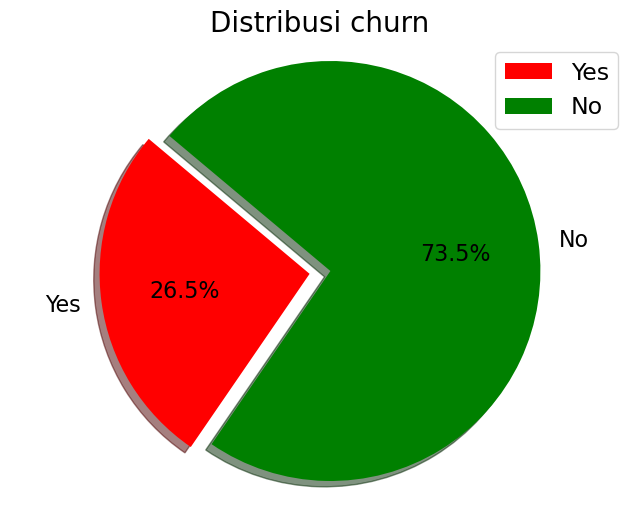

In [39]:

perhitungan_churn = tc['Churn'].value_counts(normalize=True) * 100
persentase_churn = perhitungan_churn['Yes']
labels = ['Yes', 'No']
sizes = [persentase_churn, 100 - persentase_churn]
colors = ['red', 'green']
explode = (0.1, 0)  
label_fontsize = 17  
title_fontsize = 20  
autopct_fontsize = 16  
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: custom_autopct(pct),
        shadow=True, startangle=140, textprops={'fontsize': autopct_fontsize})
plt.axis('equal')  
plt.title('Distribusi churn', fontsize=title_fontsize)
plt.legend(labels, loc="best", fontsize=label_fontsize)
plt.show()

In [40]:
tc['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

**PENDEFINISIAN X DAN Y**

In [41]:
X = tc_churn.drop(columns = ['Churn'])
y = tc_churn['Churn']

X adalah feature dan Y adalah target, dimana x berisikan nilai `Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges` dan y berisikan nilai `Churn`

**PEMBAGIAN DATA**

Dalam pemodelan saya akan menggunakan data test sebesar 0.2 dengan artian ada 20 persen data yang digunakan dalam data testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

Saya menggunakan random state 42, dan dikarenakan kita akan menggunakan klasifikasi dalam pemodelan maka kita menggunakan stratify=y

In [43]:
y_train.value_counts() / len(y_train)*100

Churn
0    73.301217
1    26.698783
Name: count, dtype: float64

In [44]:
y_test.value_counts() / len(y_test)*100

Churn
0    73.326572
1    26.673428
Name: count, dtype: float64

# PEMODELAN

DALAM MENENTUKAN MODEL YANG AKAN DIGUNAKAN KITA AKAN MENGEVALUASI MODEL YANG AKAN KITA GUNAKAN yaitu **Logistic Regression, K-Nearest Neighbors, Decision Trees, XGBoost, Gradient Boosting, Random Forest, AdaBoost (Adaptive Boosting), CatBoost (Categorical Boosting), LightGBM (Light Gradient Boosting Machine)** 

### BENCHMARK TANPA SAMPLING

In [45]:
#Pendefinisian Model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
Dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
cat = CatBoostClassifier(verbose=False,random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

In [46]:
skfold = StratifiedKFold(n_splits = 5)

In [48]:
nama_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradboost', 'Catboost', 'XGBoost', 'LightGBM']
models = [logreg,knn,Dt,rf,ada,grad,cat,xgb,lgbm]
Score = []
Rata_recall = []
std = []
for model in  models :
    estimator  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric
    Score.append(model_cv)  
    Rata_recall.append(model_cv.mean()*100)
    std.append(model_cv.std())
    

[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [49]:
Score_df = pd.DataFrame(Score)

# Display the DataFrame
print(Score_df)

          0         1         2         3         4
0  0.533333  0.507109  0.545024  0.488152  0.528571
1  0.542857  0.469194  0.450237  0.492891  0.480952
2  0.461905  0.488152  0.483412  0.507109  0.471429
3  0.514286  0.488152  0.483412  0.483412  0.514286
4  0.557143  0.516588  0.530806  0.521327  0.523810
5  0.523810  0.497630  0.521327  0.507109  0.547619
6  0.523810  0.521327  0.545024  0.497630  0.542857
7  0.561905  0.535545  0.459716  0.497630  0.504762
8  0.542857  0.521327  0.502370  0.483412  0.571429


In [50]:
pd.DataFrame({'model':nama_model,'recall rata-rata':Rata_recall,'sdev':std}).set_index('model').sort_values(by='recall rata-rata',ascending=False) 

recall rata-rata      sdev
model                                          
Adaboost             52.993455         0.014358
Catboost             52.612954         0.017190
LightGBM             52.427894         0.030748
Logistic Regression  52.043782         0.020283
Gradboost            51.949898         0.016997
XGBoost              51.191153         0.034749
Random Forest        49.670955         0.014455
KNN                  48.722636         0.031176
Decision Tree        48.240126         0.015395

Dapat dilihat bahwa Adaboost memiliki nilai rata-rata recall yang tertinggi diikuti oleh Catboost dan LightGBM, pada peringkat terbawah ada random forest dengan nilai recall rata-rata 48 persen

Saya akan coba melakukan resampling untuk melihat perubahan recall yang dihasilkan, pada hal ini saya akan menggunakan resampling ~SMOTENC~. dimana SMOTENC adalah Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Hal ini dikarenakan : 
- untuk menghindari terbuangnya data pada kelas mayoritas jika menggunakan undersampling sehingga dapat menghilangkan
informasi penting pada data tersebut. 
- untuk menghindari overfitting karena penduplikasian data yang telah ada sebelumnya sehingga pengklasifikasi terkena informasi yang sama jika menggunakan Random Oversampling.
- pada data kita terdapat fitur yang numerikal (continuous) and kategorikal (nominal).

### BENCHMARK DENGAN SAMPLING

In [ ]:
ros = RandomOverSampler(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
smote = SMOTE(random_state=2024)
near = NearMiss()
smoteen = SMOTEENN(random_state=2024)
enn = EditedNearestNeighbours() 
Smotenc = SMOTENC(categorical_features=[0, 1, 2], random_state=2024)

In [82]:

# Dictionary models 
models = {'Logistic Regression': logreg,
    'AdaBoost': ada,
    'CatBoost': cat,
    'KNN': knn,
    'Decision Tree': Dt,
    'Random Forest': rf,
    'Gradboost': grad,
    'XGBoost': xgb,
    'LightGBM': lgbm
          }

# Dictionary resampling method 
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'enn': enn,
    'near miss': near,
    'smoteenn': smoteen,
    'Smotenc' : Smotenc
}

# Dictionary metrics 
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
              'f1': 'f1',}

In [84]:
# Define resampling methods from best 5 results
smoteenn = SMOTEENN(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
ros = RandomOverSampler(random_state=2024)
enn = EditedNearestNeighbours()
smotenc = SMOTENC(categorical_features=[0, 1, 2], random_state=2024)  # Adjust categorical feature indices

# Initialize your models and resampling methods (example, make sure all models and methods are defined)
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradboost': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'enn': enn,
    'near miss': near,
    'smoteenn': smoteen,
    'Smotenc': Smotenc
}

metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}



# Initialize lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# New list to store recall before resampling
test_recall_no_resample_arr = []

# Initialize StratifiedKFold for cross-validation
skfold = StratifiedKFold(n_splits=5)

# Function to calculate recall without resampling
def calculate_recall_no_resampling(model, X_train, y_train):
    estimator_no_resample = Pipeline([
        ('transform', transformer),
        ('model', model),
    ])
    scores_no_resample = cross_val_score(estimator_no_resample, X_train, y_train, cv=skfold, scoring='recall')
    return scores_no_resample.mean() * 100  # Return mean of recall across folds

# Iterate over all models and resampling methods
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        # Build pipeline
        if resample is None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        
        # Cross-validation to get the mean recall score with resampling
        scores = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
        test_recall_arr.append(scores.mean() * 100)  # Store mean recall score

        # Calculate and append recall without resampling
        recall_no_resample = calculate_recall_no_resampling(model, X_train, y_train)
        test_recall_no_resample_arr.append(recall_no_resample)

# Create a DataFrame to display the results
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'recall_resampling': test_recall_arr,
    'recall_no_resampling': test_recall_no_resample_arr,
})

# Sort by recall with resampling and display the top results
model_bench.sort_values('recall_resampling', ascending=False).head()

Learning rate set to 0.016827
0:	learn: 0.6814135	total: 4.03ms	remaining: 4.02s
1:	learn: 0.6705961	total: 7.68ms	remaining: 3.83s
2:	learn: 0.6595521	total: 11.1ms	remaining: 3.7s
3:	learn: 0.6490700	total: 14.7ms	remaining: 3.65s
4:	learn: 0.6403466	total: 17.4ms	remaining: 3.47s
5:	learn: 0.6314760	total: 21.1ms	remaining: 3.49s
6:	learn: 0.6227729	total: 24.6ms	remaining: 3.49s
7:	learn: 0.6147423	total: 27.6ms	remaining: 3.43s
8:	learn: 0.6067838	total: 31ms	remaining: 3.41s
9:	learn: 0.5990150	total: 34.4ms	remaining: 3.41s
10:	learn: 0.5911510	total: 37.8ms	remaining: 3.4s
11:	learn: 0.5841033	total: 40.5ms	remaining: 3.34s
12:	learn: 0.5771615	total: 43.6ms	remaining: 3.31s
13:	learn: 0.5704996	total: 46.7ms	remaining: 3.29s
14:	learn: 0.5641457	total: 50.1ms	remaining: 3.29s
15:	learn: 0.5587044	total: 52.6ms	remaining: 3.23s
16:	learn: 0.5534101	total: 55.2ms	remaining: 3.19s
17:	learn: 0.5481557	total: 58.3ms	remaining: 3.18s
18:	learn: 0.5427382	total: 61.4ms	remaining: 3.

model  resample  recall_resampling  recall_no_resampling
54  Logistic Regression  smoteenn  84.332205          52.139472           
37  AdaBoost             enn       82.436922          52.993455           
19  AdaBoost             rus       80.726247          52.993455           
55  AdaBoost             smoteenn  80.343489          52.993455           
40  Decision Tree        enn       80.059580          48.524487

Dapat dilihat bahwa sampling yang paling baik digunakan adalah smoteen pada logistic regession, sehingga smoteenn akan digunakan sebagai sampling tetap untuk permodelan machine learning

In [85]:
resample = SMOTEENN(random_state=2024)

In [86]:
nama_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradboost', 'Catboost', 'XGBoost', 'LightGBM']
models = [logreg,knn,Dt,rf,ada,grad,cat,xgb,lgbm]
list_mean_with_sampling = []
list_std_with_sampling = []
list_mean_without_sampling = []
list_std_without_sampling = []
for model in  models :
    #MODEL DENGAN SAMPLING
    estimator_sampling  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)])
    model_cv_with_sampling=cross_val_score(estimator_sampling,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric 
    list_mean_with_sampling.append(model_cv_with_sampling.mean()*100)
    list_std_with_sampling.append(model_cv_with_sampling.std())
    #MODEL TANPA SAMPLING
    estimator_no_sampling  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)])
    model_cv_without_sampling=cross_val_score(estimator_no_sampling,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric 
    list_mean_without_sampling.append(model_cv_without_sampling.mean()*100)
    list_std_without_sampling.append(model_cv_without_sampling.std())


[LightGBM] [Info] Number of positive: 1363, number of negative: 1352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 2715, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502026 -> initscore=0.008103
[LightGBM] [Info] Start training from score 0.008103
[LightGBM] [Info] Number of positive: 1355, number of negative: 1340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 2695, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [87]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_recall_with_sampling' : list_mean_with_sampling,
    'mean_recall_without_sampling' : list_mean_without_sampling,
    'std_recall_with_sampling' : list_std_with_sampling,
    'std_recall_without_sampling' : list_std_without_sampling,
}).sort_values('mean_recall_with_sampling', ascending=False)

model  mean_recall_with_sampling  \
0  Logistic Regression  81.485443                   
4  AdaBoost             80.346197                   
5  GradienBoost         78.538479                   
6  CatBoost             76.353870                   
1  KNN                  75.687204                   
7  XGBoost              74.834123                   
8  LightGBM             74.549763                   
3  Random Forest        73.694426                   
2  Decision Tree        71.984654                   

   mean_recall_without_sampling  std_recall_with_sampling  \
0  52.043782                     0.020004                   
4  52.993455                     0.027631                   
5  51.949898                     0.015597                   
6  52.612954                     0.027254                   
1  48.722636                     0.015892                   
7  51.191153                     0.037921                   
8  52.427894                     0.017030                   
3  49.670955                     0.033697                   
2  48.240126                     0.030478                   

   std_recall_without_sampling  
0  0.020283                     
4  0.014358                     
5  0.016997                     
6  0.017190                     
1  0.031176                     
7  0.034749                     
8  0.030748                     
3  0.014455                     
2  0.015395

Setelah dilakukan resampling dengan SMOTENN didapat bahwa ada boost dan logistic regression memiliki nilai rata-rata recall tertinggi dengan 81% diikuti oleh ada boost dan gradienboost. Terlihat juga bahwa untuk rata-rata recall  lebih baik setelah dilakukan sampling dibandingkan tanpa sampling, hal ini dapat membantu dalam mengoptimalkan machine learning

### PERCOBAAN PADA TRAIN DAN TEST DATA

In [91]:
# Define models from best 5 results
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
Dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
cat = CatBoostClassifier(verbose=False, random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Define resampling methods from best 5 results
smoteenn = SMOTEENN(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
ros = RandomOverSampler(random_state=2024)
enn = EditedNearestNeighbours()
smotenc = SMOTENC(categorical_features=[0, 1, 2], random_state=2024)  # Adjust categorical feature indices

# Models list
models = [
    ('Logistic Regression', logreg),
    ('AdaBoost', ada),
    ('CatBoost', cat),
    ('KNN', knn),
    ('Decision Tree', Dt),
    ('Random Forest', rf),
    ('Gradboost', grad),
    ('XGBoost', xgb),
    ('LightGBM', lgbm)
]

# Resampling methods list
resamples = [
    ('SMOTEENN', smoteenn),
    ('RUS', rus),
    ('ROS', ros),
    ('ENN', enn),
    ('SMOTENC', smotenc)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transform', transformer),  # Define transformer
            ('resampling', resample),
            ('model', model)
        ])
        
        # Fit the pipeline
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Append metrics and confusion matrix
        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])
        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Recall', 'Accuracy', 'Precision', 'F1'], index=index_names)

# Display the result sorted by Recall
metrics_df.sort_values('Recall', ascending=False)

[LightGBM] [Info] Number of positive: 2009, number of negative: 1555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 3564, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563692 -> initscore=0.256162
[LightGBM] [Info] Start training from score 0.256162
[LightGBM] [Info] Number of positive: 1053, number of negative: 1053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 2106, number of used features: 10
[LightGBM] [Info] [binary:B

Recall   Accuracy  Precision         F1
Logistic Regression with SMOTEENN  87.452471  72.109533  48.728814  62.585034
AdaBoost with SMOTEENN             85.171103  74.746450  51.612903  64.275466
AdaBoost with ENN                  84.790875  74.543611  51.382488  63.988522
Logistic Regression with RUS       83.269962  75.659229  52.771084  64.601770
XGBoost with ENN                   82.509506  73.833671  50.582751  62.716763
AdaBoost with RUS                  82.129278  74.239351  51.063830  62.973761
LightGBM with ENN                  82.129278  75.152130  52.173913  63.810931
KNN with SMOTEENN                  82.129278  68.255578  44.813278  57.986577
Logistic Regression with ROS       81.749049  75.253550  52.311436  63.798220
AdaBoost with ROS                  81.749049  75.050710  52.058111  63.609467
CatBoost with ENN                  81.368821  75.659229  52.839506  64.071856
Gradboost with ENN                 81.368821  75.354970  52.450980  63.785395
Logistic Regression with ENN       80.988593  74.949290  51.951220  63.298663
CatBoost with RUS                  80.608365  75.456389  52.605459  63.663664
Gradboost with ROS                 80.228137  75.760649  53.015075  63.842663
Gradboost with RUS                 80.228137  74.949290  51.970443  63.079223
Gradboost with SMOTEENN            80.228137  75.862069  53.148615  63.939394
Random Forest with ENN             80.228137  76.166329  53.553299  64.231355
XGBoost with SMOTEENN              79.847909  75.456389  52.631579  63.444109
Decision Tree with ENN             79.847909  69.371197  45.751634  58.171745
LightGBM with RUS                  79.467681  74.239351  51.100244  62.202381
Random Forest with SMOTEENN        79.087452  76.572008  54.166667  64.296754
Logistic Regression with SMOTENC   79.087452  75.862069  53.196931  63.608563
LightGBM with SMOTEENN             78.707224  76.369168  53.906250  63.987635
Decision Tree with SMOTEENN        78.326996  74.036511  50.864198  61.676647
CatBoost with SMOTEENN             77.566540  76.369168  53.968254  63.650546
KNN with ENN                       77.186312  72.008114  48.448687  59.530792
XGBoost with RUS                   76.425856  72.210953  48.668281  59.467456
Random Forest with RUS             75.665399  74.543611  51.554404  61.325116
KNN with RUS                       74.524715  72.312373  48.756219  58.947368
CatBoost with ROS                  74.524715  76.470588  54.293629  62.820513
LightGBM with ROS                  74.144487  77.180527  55.397727  63.414634
AdaBoost with SMOTENC              72.623574  77.890467  56.676558  63.666667
KNN with ROS                       71.482890  70.588235  46.650124  56.456456
Gradboost with SMOTENC             71.482890  78.600406  58.024691  64.054514
KNN with SMOTENC                   70.342205  70.283976  46.250000  55.806938
Decision Tree with RUS             69.581749  67.342799  43.058824  53.197674
XGBoost with ROS                   69.201521  76.267748  54.328358  60.869565
CatBoost with SMOTENC              66.920152  79.614604  60.689655  63.652803
LightGBM with SMOTENC              66.159696  79.107505  59.793814  62.815884
XGBoost with SMOTENC               62.737643  78.701826  59.566787  61.111111
Random Forest with ROS             55.893536  77.383367  57.874016  56.866538
Random Forest with SMOTENC         55.133080  77.890467  59.183673  57.086614
Decision Tree with SMOTENC         50.950570  72.819473  49.084249  50.000000
Decision Tree with ROS             49.809886  73.732252  50.775194  50.287908

In [117]:
# Define models from best 5 results
logreg = LogisticRegression(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
cat = CatBoostClassifier(verbose=False, random_state=2024)

# Define resampling methods from best 5 results
smoteenn = SMOTEENN(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
ros = RandomOverSampler(random_state=2024)
enn = EditedNearestNeighbours()


models = [
    ('Logistic Regression', logreg),
    ('AdaBoost ', ada),
    ('CatBoost', cat)
]

resamples = [
    ('SMOTEENN', smoteenn),
    ('RUS', rus),
    ('ROS', ros),
    ('ENN', enn)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:   
        pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)


metrics_df.head().sort_values('Recall', ascending=False) # Display Resample Result, Sort by recall

Recall   Accuracy  Precision         F1
Logistic Regression with SMOTEENN  87.452471  72.109533  48.728814  62.585034
AdaBoost  with SMOTEENN            85.171103  74.746450  51.612903  64.275466
Logistic Regression with RUS       83.269962  75.659229  52.771084  64.601770
Logistic Regression with ROS       81.749049  75.253550  52.311436  63.798220
Logistic Regression with ENN       80.988593  74.949290  51.951220  63.298663

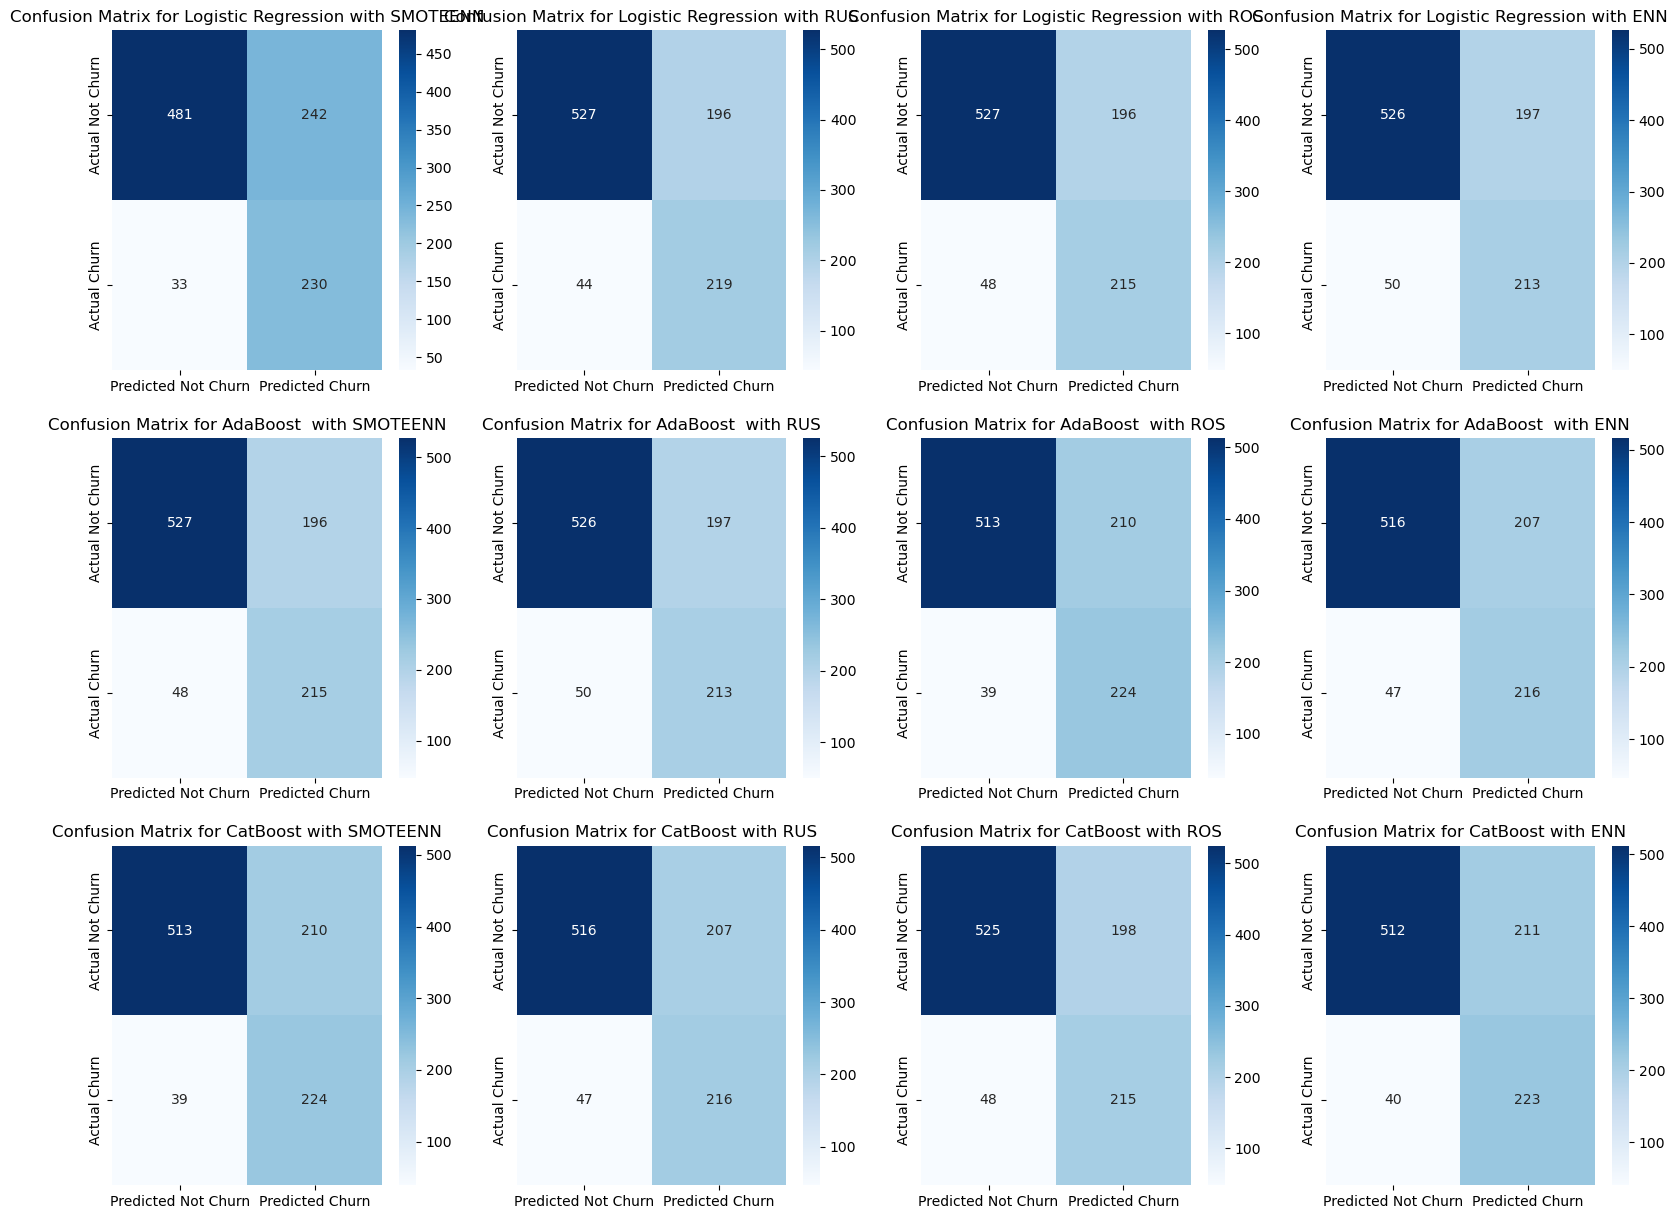

In [118]:
# Display the confusion matrix for models
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, (model_name, _) in enumerate(models):
    for j, (resample_name, _) in enumerate(resamples):
        sns.heatmap(conf_matrix[2*i + j], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                    yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} with {resample_name}");


Berdasarkan matriks konfusi dan metrik kinerja yang diberikan, berdasarkan perolehan (kemampuan untuk mengidentifikasi dengan benar semua churn aktual), model pilihan terbaik adalah **Logistic Regression**. 

- **Recall**: Logistic Regression memiliki recall sekitar 87,45%, yang merupakan tertinggi di antara semua model. Artinya, ini adalah cara terbaik dalam mengidentifikasi pelanggan yang akan melakukan churn dengan benar.
- **Skor F1**: Ia juga memiliki skor F1 kompetitif, yang merupakan rata-rata harmonis antara presisi dan perolehan. Skor F1 yang tinggi menunjukkan model yang seimbang dengan performa yang baik dalam presisi dan perolehan.

Meskipun model lain mungkin memiliki akurasi atau presisi yang lebih tinggi, tujuan utamanya adalah meminimalkan risiko hilangnya potensi churn (sehingga memaksimalkan recall). Regresi Logistik dengan SMOTEEN menonjol sebagai pilihan terbaik di antara opsi yang tersedia. Model ini akan memastikan bahwa jumlah maksimum pelanggan yang kemungkinan akan churn teridentifikasi untuk potensi tindakan retensi

### HYPERPARAMETER TUNING 

Setelah kita melihat dan memilih yang terbaik dalam recall adalah logistic regression degan nilai 84,03% , selanjutnya kita akan melakukan tuning pada model yang kita pilih dengan Grid Search

Logistic Regression adalah cara untuk memprediksi peluang hasil 'ya' atau 'tidak', seperti apakah seseorang akan membeli suatu produk (ya atau tidak), atau apakah pasien mengidap suatu penyakit (ya atau tidak). Ini cukup populer karena sederhana dan efektif. Logistic Regression  adalah cara menarik garis yang paling baik dalam memisahkan dua kelompok, seperti memisahkan anggur dari semangka berdasarkan berat dan warnanya. Untuk regresi logistik, baris ini membantu kita memutuskan apakah suatu data baru, seperti email,  (bukan spam) atau  (spam)

In [92]:
# Define Hyperparameter space 

hyperparam_space = {
    'model__penalty': [None, 'l2', 'l1', 'elasticnet'], #
    'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
    'model__max_iter': [9, 125, 100],
    'model__verbose': [0,1,2]
}

logreg = LogisticRegression(random_state=2024)
smoteenn = SMOTEENN(random_state=2024)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define the grid search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,  # hyperparameter space
    cv=StratifiedKFold(n_splits=5),  # cross-validation scheme 
    scoring = 'recall',   # evaluation metrics
    n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Inte...
                                                                         ['InternetService',
                                                                          'Contract'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=2024)),
                                       ('model',
                                        LogisticRegression(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'model__max_iter': [9, 125, 100],
                         'model__penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
                         'model__verbose': [0, 1, 2]},
             scoring='recall')

In [93]:
print('Best Hyperparameters: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)

Best Hyperparameters:  {'model__C': 0.1, 'model__max_iter': 125, 'model__penalty': 'l1', 'model__solver': 'saga', 'model__verbose': 0}
Best Score:  0.8547461069735952


Score terbaik yang didapat adalah 85 % dengan parameter terbaiknya adalah {'model__C': 0.1, 'model__max_iter': 125, 'model__penalty': 'l1', 'model__solver': 'saga', 'model__verbose': 0}

In [95]:
gridsearch.best_score_

0.8547461069735952

In [96]:
logreg_tuning = gridsearch.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['InternetService',
                                                                       'Contract'],
                                                                 mapping=[{'col': 'InternetService',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None           0
Fiber optic    3
DSL            2
No             1
dtype: int64},
                                                                          {'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None              0
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                                  ['InternetService',
                                                   'Contract'])])),
                ('resampling', SMOTEENN(random_state=2024)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=125, penalty='l1',
                                    random_state=2024, solver='saga'))])

In [98]:
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100


logreg_after_tuning = pd.DataFrame({'Recall': recall_logreg_tuning,
                                    'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                  'F1': f1_logreg_tuning}, index=['Logistic Regression After Tune'])

# Display the metrics for the Grid Search
metrics_df = metrics_df.rename(index={'Logistic Regression with SMOTEENN': 'Logistic Regression before Tune'})
metrics_df = metrics_df.loc[['Logistic Regression before Tune']]
metrics_df

metrics_df = pd.concat([logreg_after_tuning, metrics_df])
metrics_df

Recall   Accuracy  Precision         F1
Logistic Regression After Tune   87.832700  69.066937  45.833333  60.234681
Logistic Regression before Tune  87.452471  72.109533  48.728814  62.585034

In [99]:
#  HASIL RECALL PADA SAAT TRAIN 
logreg_benchmark = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', smoteen),
    ('algo', LogisticRegression( random_state=42))
])

logreg_benchmark.fit(X_train, y_train)
y_pred_logreg_benchmark = logreg_benchmark.predict(X_test)
recall_score(y_test, y_pred_logreg_benchmark)*100

84.03041825095056

In [101]:
#  HASIL RECALL PADA SAAT TEST DENGAN HYPERPARAMETER TUNING
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100

recall_logreg_tuning

87.83269961977186

nilai recall mengalami peningkatan setelah tunning dari 87,4 persen menjadi 87.8%, hal ini selaras dengan keinginan kita untuk meningkatkan nilai recall, dikarenakan niai recall adalah nilai evaluasi metrik yang kita gunakan

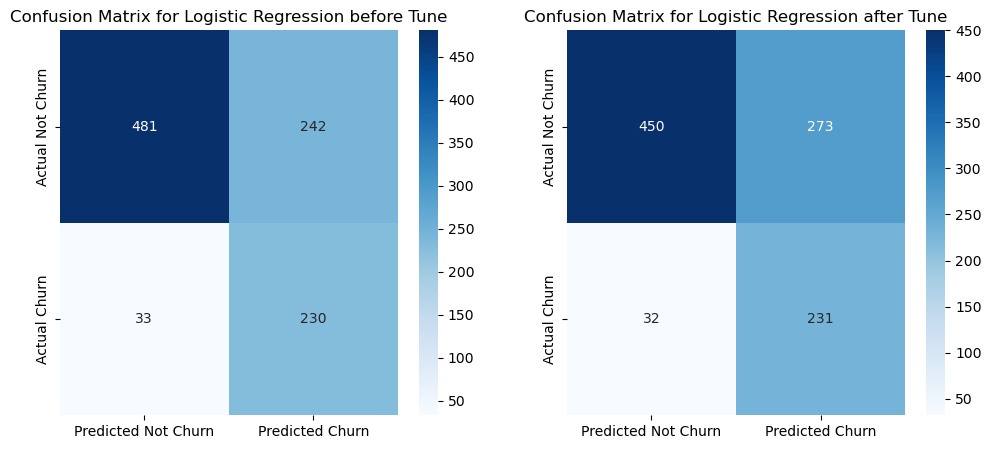

In [104]:
# Display the confusion matrix for Logistic Regression after tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_logreg_tuning)

# Define the models and confusion matrices
logreg_models = [models[0], ('Logistic Regression', logreg_tuning)]
logreg_conf_matrices = [conf_matrix[0], conf_matrix_tuned]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(logreg_models) - 1 else ' after Tune'));

Berdasarkan gambar di atas, terdapat peningkatan pada skor 'recall' setelah penyetelan hyperparameter, meskipun hal ini menyebabkan penurunan 'presisi' karena adanya trade-off di antara keduanya

>Perbandingan matriks konfusi sebelum dan sesudah penyetelan hyperparameter melalui GridSearch menunjukkan peningkatan dalam penarikan kembali model Regresi Logistik:

**Sebelum tunning model**, kemampuan model untuk mengidentifikasi pelanggan yang akan melakukan churn (**recall**) diwakili oleh **230 True Positives** versus **33 False Negatives**. Hal ini menghasilkan **penarikan** sekitar **87,45%**, dihitung sebagai 230 / (230 + 33).

**Model setelah tunning** menunjukkan peningkatan **True Positives** menjadi **231** dan penurunan **False Negatives** menjadi **32**. Penarikan kembali yang disesuaikan kira-kira **87,83%**, dihitung sebagai 231 / (231 + 32), yang menunjukkan sedikit peningkatan pada kemampuan model untuk mengidentifikasi dengan benar pelanggan yang berisiko berhenti berlangganan.

>Hasil ini menggarisbawahi peningkatan sensitivitas model pasca-penyesuaian terhadap prediksi churn, yang merupakan aspek penting bagi bisnis yang berfokus pada mempertahankan pelanggan. Dengan meningkatkan recall, model ini memastikan lebih sedikit kasus churn yang luput dari perhatian, sehingga memungkinkan dilakukannya intervensi retensi pelanggan yang lebih tepat sasaran dan efektif. Perbedaan dalam hal presisi, yang terlihat pada sedikit peningkatan pada False Positives, sering kali dapat diterima dalam skenario di mana kerugian akibat kehilangan churn lebih tinggi dibandingkan kerugian akibat alarm palsu. Oleh karena itu, fokus pada penarikan kembali setelah penyetelan hyperparameter menunjukkan keselarasan model dengan strategi retensi pelanggan yang proaktif.

**MENYIMPAN MODEL TERPILIH**

In [108]:
final_model = gridsearch.best_estimator_
final_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['InternetService',
                                                                       'Contract'],
                                                                 mapping=[{'col': 'InternetService',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None           0
Fiber optic    3
DSL            2
No             1
dtype: int64},
                                                                          {'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None              0
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                                  ['InternetService',
                                                   'Contract'])])),
                ('resampling', SMOTEENN(random_state=2024)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=125, penalty='l1',
                                    random_state=2024, solver='saga'))])

Final model yang kita pilih adalah logistic Regresion yang sudah di tuning, hal ini ditandai dengan terjadinya peningkatan pada nilai recall

### FEATURE IMPORTANCES

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Logistic Regression kita

In [122]:
names = transformer.get_feature_names_out
names

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaperlessBilling']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['InternetService',
                                                      'Contract'],
                                                mapping=[{'col': 'InternetService',
                                                          'data_type': dtype('O'),
                                                          'mapping': None           0
Fiber optic    3
DSL            2
No             1
dtype: int64},
                                                         {'col': 'Contract',
                                

In [123]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:  # the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1], Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names_out(raw_col_name)
        except AttributeError:
            names = raw_col_name
        col_name.extend(names)
    return col_name

# Usage:
# Assuming your_column_transformer is defined earlier
names = get_column_names_from_ColumnTransformer(transformer)  # Pass your ColumnTransformer object here

# Given columns and codes
columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
codes = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']
list_name = []

# Replace variable codes with column names
for i, (code, column) in enumerate(zip(codes, columns)):
    list_name.append(names[i].replace(code, column))

# Extend the list with additional column names
additional_columns = ['ordinal__InternetService', 'ordinal__Contract', 'tenure', 'MonthlyCharges']
list_name.extend(additional_columns)

print(list_name)

['Dependents_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'PaperlessBilling_Yes', 'ordinal__InternetService', 'ordinal__Contract', 'tenure', 'MonthlyCharges']


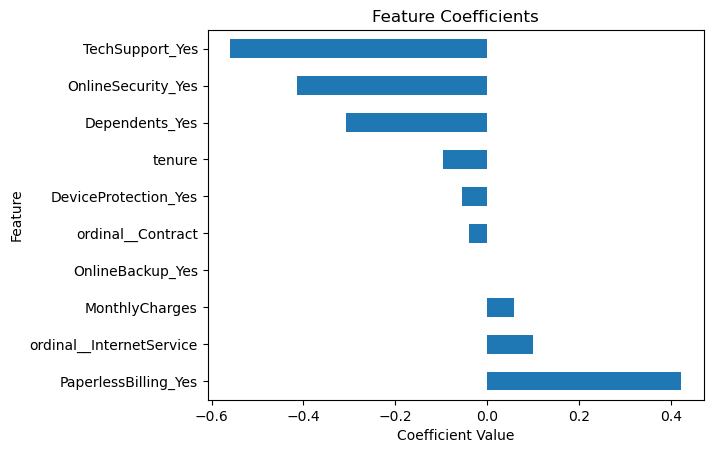

In [124]:
coefficients = logreg_tuning['model'].coef_[0]

# Create a Series with coefficients and corresponding feature names
coef1 = pd.Series(coefficients, index=list_name).sort_values(ascending=False).head(10)

# Plot the coefficients
coef1.plot(kind='barh', title='Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**Pengaruh Negatif (Fitur yang mengurangi kemungkinan churn):**
- **Jangka Waktu**: Pelanggan dengan jangka waktu lebih lama cenderung tidak melakukan churn. Koefisien negatif untuk 'masa kerja' menunjukkan bahwa semakin lama pelanggan menggunakan layanan, kecenderungan mereka untuk meninggalkan layanan menurun.
- **Jenis Kontrak**: Koefisien negatif untuk 'Tech Support' dan 'Online Security' menyiratkan bahwa pelanggan dengan support teknis dan kemaanan yang baik serta ketergantungan cenderung tidak melakukan churn, yang menunjukkan bahwa perjanjian kebutuhan dan support yang maksimal kepada pelanggan menghasilkan retensi pelanggan yang lebih baik.

**Pengaruh Positif (Menampilkan peningkatan kemungkinan churn):**
- **Layanan service _ordinal**: Koefisien positif untuk 'Layanan servis secara ordinal' menunjukkan bahwa pelanggan dengan jenis layanan internet ini lebih cenderung melakukan churn. 
- **Penagihan Tanpa Kertas**: Diagram sebenarnya menunjukkan koefisien positif untuk 'Penagihan Tanpa Kertas_Ya', yang berarti bahwa memilih penagihan tanpa kertas meningkatkan kemungkinan churn.

> Model ini menunjukkan bahwa tech support jangka panjang dan kemanan digital sertta kebutuhan terhadap penyedia layanan merupakan indikator kuat loyalitas pelanggan, sedangkan layanan ordinal_internet service ternyata memiliki tingkat churn yang lebih tinggi. Namun, koefisien negatif untuk penagihan tanpa kertas menunjukkan bahwa pelanggan yang menggunakan metode penagihan digital cenderung tidak melakukan churn. Penting bagi penyedia layanan untuk mempertimbangkan wawasan ini guna mengembangkan strategi yang ditargetkan untuk retensi pelanggan.


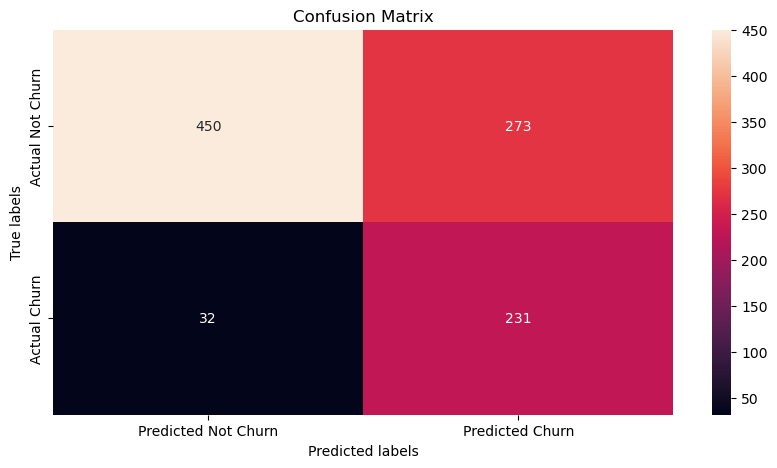

In [120]:
fig, axes = plt.subplots(figsize=(10, 5))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg_tuning)

# Create heatmap
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes)

# Set axis labels and title
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix')

# Show plot
plt.show()









Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model Decision Tree yang telah kita buat didapati:
- Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 231 orang
- Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 32 orang
- Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 450orang
- Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 273 orang
- Jumlah pelanggan yang diprediksi akan churn sebanyak 231 + 273 = 504 orang
- Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 450 + 32 = 482 orang

## **Perhitungan Penghematan Biaya**:

#### **Tanpa Mechine Learning:**
- Dengan asumsi kami mencoba mempertahankan semua pelanggan karena risiko churn dengan data aktual, biayanya adalah **$1** per pelanggan untuk **986 Pelanggan**.
- Jumlah pelanggan = 986
- Pelanggan yang churn = 261; Pelanggan Non-Churned = 725
- Total Biaya Retensi = Total pelanggan × $1.
- **Total Biaya = $986**

#### **Dengan Model Machinen Learning:**
- Kami hanya berusaha mempertahankan pelanggan yang diprediksi akan churn (TP + FP).
- False Negatif menunjukkan pelanggan yang berhenti berlangganan dan memerlukan akuisisi.
- Total Biaya = (TP × Biaya Retensi) + (FP × Biaya Retensi) + (FN × Biaya Akuisisi).

Mari terapkan perhitungan ini ke model akhir:

- True Positives (TP): 231 pelanggan yang diidentifikasi dengan benar sebagai churn.
- False Positives (FP): 273 pelanggan salah diidentifikasi sebagai churn.
- False Negatives (FN): 32 pelanggan salah diidentifikasi sebagai tidak melakukan churn.

#### Biaya yang Dihitung:
- Biaya Retensi per pelanggan: $1.
- Biaya Akuisisi per pelanggan: $5 (karena lima kali lipat biaya retensi). (Dibayar saat proses registrasi)

#### Perhitungan Biaya Akhir:
- Total Biaya dengan Model ML = (TP × $1) + (FP × $1) + (FN × $5)
- Total Biaya dengan Model ML = (231 × $1) + (273 × $1) + (32 × $5)
- Total Biaya Dengan Model ML = $760

### Penghematan biaya:

 Tanpa Biaya Retensi Model Machine Learning: **$986**.

 Dengan Total Biaya Model Machine Learning: **$760**.

 Terdapat selisih biaya sebesar **$226**.

## Batasan Model (limit)

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `tenure` antara 0 sampai dengan 72 bulan 
* `MonthlyCharges` antara 18.8 sampai dengan 118.65
* `Contract` dalam jangka Month-to-month, One year, dan Two Year
* `InternetService` berupa 'DSL', 'Fiber Optic' dan 'No'
* `Dependent, Paperless Billing` dengan nilai 'Yes' atau 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport` berisi pilihan 'Yes', 'No' atau 'No internet service'.

## KESIMPULAN

- Metric utama yang digunakan adalah recall, dimana terdapat peningkatan nilai recall dan penurunan nilai FN pada model setelah di tuning

- Model terbaik yang didapat adalah logistric regression yang telah di hyperparameter tuning dengan gridsearch dengan parameter terbaik adalah {'model__C': 0.1, 'model__max_iter': 125, 'model__penalty': 'l1', 'model__solver': 'saga', 'model__verbose': 0}

- Berdasarkan permodelan nilai feature/kolom terpenting adalah papperlessbilling dan Internet service yang cenderung akan melakukan churn, kemudian diikuti oleh tech support (yes) dan online security (yes) yang berpotensi tidak akan churn

- Berdasarkan contoh perhitungan biaya :
    - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $986 per bulan untuk 986 pelanggan
    - Potensi kerugian yang mungkin didapat dengan menerapkan model Logistic regression yang telah dibuat diperkirakan sebesar : $760 per bulan untuk 986 pelanggan
    - terdapat selisih kerugian sebesar $ 226

## REKOMENDASI

DALAM hal bisnis yang harus dilakukan adalah :

- Memberikan pilihan kemudahan pembayaran kepada pelanggan dengan pilihan pembayaran secara lagsung maupun digital, dimana pembayaran digital juga tetap diikuti dengan pemberian nota pembayaan kepada pelanggan

- Meningkatkan dan mempetahankan tingkat pelayanan oleh perusahaan kepads pelanggan khusunya dalam hal service layanan purna jual serta kemanan digital pengguna layanan telekomunikasi

- Memberikan diskon/potongan harga `MonthlyCharges` bagi pegawai yang terindikasi/diprediksi akan churn, khususnya untuk pelanggan yang memiliki `MonthlyCharges`yang tinggi

- Memberikan `Layanan Internet` yang lebih murah, hal ini dapat membantu pelanggan agar tidak melakukan churn dan cenderung untuk bertahan

- melakukan survey berkelanjutan pada setiap bulannya terkait dengan kualitas telekomunikasi yang dirasakan pelanggan

Dalam Hal Machine Learning :

- Mencoba algorithm ML dan hyperparameter tuning yang berbeda (misal algoritma Decision Tree, CatBoost, etc) serta menggunakan teknik oversampling yang berbeda selain SMOTENN. 

- Memantau performa model secara konsisten dan perbarui dengan data baru agar daya prediksinya tetap akurat.

- Melakukan penambahan data khususnya untuk kelas minoritas (Churn) agar dapat membantu meningkatkan performa model

- Menggunakan metric lain seperti Roc Auc untuk mengevaluasi model

- Menambbahkan lebih banyak fitur/ kolom seperti jenis telekomunikasi suara, sms, dan internet

- Menambahkan fitur-fitur atau kolom baru yang berisi tingkat kepuasan pelanggan untuk masing-masing layanan, sehingga dapat diketahui lebih lanjut apakah churn disebabkan oleh kualitas layanan yang buruk atau tidak

In [125]:
import pickle

In [128]:
file_name = 'model_final.sav'
pickle.dump(final_model, open(file_name, 'wb'))